# [YOLOv8](https://docs.ultralytics.com/)

## 설치

- `pip install ultralytics`
- 주피터노트북에서 실행할 경우 프로그래스바를 실행하기 위해서 다음을 설치한다. (필수는 아님)
    - `pip install ipywidgets` or `conda install -y -c conda-forge ipywidgets`

In [1]:
!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/12/44/1ae54087337a2a446fd3a2876570765a3c2676e481f7bf8cc81a45ded356/ultralytics-8.0.207-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python>=4.6.0 from https://files.pythonhosted.org/packages/05/58/7ee92b21cb98689cbe28c69e3cf8ee51f261bfb6bc904ae578736d22d2e7/opencv_python-4.8.1.78-cp37-abi3-macosx_10_16_x86_64.whl.metadata
  Obtaining dependency information for seaborn>=0.11.0 from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 10.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 24.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 7.8 MB/s eta 0:00:00


## 사용
- CLI (command line interface)에서 터미널 명령어로 추론/평가/학습을 진행할 수 있다.
- Python lib 를 이용해 코드상에 원하는 추론/평가/학습을 진행할 수 있다.

# CLI 기본 명령어 구조

- 구문
    - <span style='font-size:1.3em'>**yolo**  **task**=detect|classify|segment|pose  **mode**=train|val|predict  **model**=yolov8n.yaml|yolov8n.pt|..  **args**</span>
    - <b style='font-size:1.2em'>task:</b> \[detect, classify, segment\] 중 하나를 지정한다. \[optional\]로 생략하면 모델을 보고 추측해서 task를 정한다.
        - **detect:** Object detection
        - **classify:** Image classification
        - **segment:** Instance segmentation
        - **pose:** Pose estimation
    - <b style='font-size:1.2em'>mode:</b> \[train, val, predict, export\] 중 하나를 지정한다. \[필수\]로 입력해야 한다.
        - **train:** custom dataset을 train 시킨다.
        - **val:** 모델 성능을 평가한다.
        - **predict:** 입력 이미지에 대한 추론을 한다.
        - **export:** 모델을 다른 형식으로 변환한다.
    - <b style='font-size:1.2em'>model:</b> **pretrained 모델**이나 **모델 설정 yaml 파일**의 경로를 설정한다. \[필수\]로 입력해야 한다.
        - pretrained 모델 파일경로
            - task에 맞는 pretrained 모델파일의 저장 경로를 지정한다.
            - transfer learnging을 하거나 fine tuning 시 방법
        - 모델 구조 설정 yaml 파일 경로
            - task에 맞는 pretrained 모델 설정파일(yaml파일)의 경로를 지정한다.
            - train mode에서 지정하며 모델을 새로 생성해서 처음부터 학습 시킬 경우 지정한다.
        - Ultralytics에서 제공하는 Pretrained 모델
            - 모델 크기에 따라 5개의 모델을 제공하며 큰 모델은 작은 모델에 비해 추론 성능이 좋은대신 속도는 느리다.
            - 모델은 처음 추론또는 학습할때 local 컴퓨터에 없으면 download 받는다.
            - https://github.com/ultralytics/ultralytics#models
            - ### 제공 모델
            
            | **task\모델크기**           | **nano** | **small** | **medium** | **large** | **xlarge** |
            |:--------------------|----------|-------------|------------|-----------|----------|
            | **detection**      | yolov8n  | yolov8s     | yolov8m    | yolov8l   | yolov8x    |
            | **segmentation**   | yolov8n-seg  | yolov8s-seg     | yolov8m-seg    | yolov8l-seg   | yolov8x-seg    |
            | **classification** | yolov8n-cls  | yolov8s-cls     | yolov8m-cls    | yolov8l-cls   | yolov8x-cls    |            
            
            - 확장자가 `pt`이면 pretrained 된 모델을, `yaml`이면 모델 구조 설정파일을 download하여 실행한다.
                - pretrained model은 fine tuning이나 추론할 때, yaml설정파일은 처음부터 학습할 경우 설정하여 받는다.
    - <b style='font-size:1.2em'>args:</b> task와 mode과 관련한 추가 설정값들을 지정한다.
        - https://docs.ultralytics.com/cfg/

# [Object Detection](https://docs.ultralytics.com/tasks/detection/)

##  Predict (추론)

### 모델로딩
- Ultralytics에서 제공하는 Pretrained Model이나 직접 학습시킨 모델을 이용해 추론한다.
- Ultralytics는 Object Detection을 위한 [Pretrained 모델](#제공-모델)을 제공한다.
    - Object Detection 모델은 COCO dataset으로 학습되었다.
    - 모델 명을 지정하면 자동으로 다운로드를 받는다.

### CLI
`yolo task=detect mode=predict model=model_path source=추론할_image_path`
- 추가 설정 (configuration)
    - https://docs.ultralytics.com/cfg
    

> - argument 설정은 `name=value` 형식으로 한다. (`--name value`나 `name value` 는 안된다.)

> ### 추론 할 Source 타입
> - https://docs.ultralytics.com/modes/predict/#inference-sources
> - **Image:** 이미지파일경로, URL, PIL.Image, np.ndarray, torch.Tensor
> - **동영상:** 동영상파일경로, 유튜브 URL, 웹캠
> - **여러개의 영상처리:** 디렉토리 경로 또는 경로들을 원소로 가지는 리스트.

In [ ]:
yolo task=detect mode=predict model=models/yolov8s.pt source=01_test_image/1.jpg save=True save_txt=True line_width=1

In [ ]:
yolo task=detect  # 어떤 작업을 할지
     mode=predict  # 그 작업 안에서 어떤 일을 할지
     model=models/yolov8s.pt  # fine tuning시 사용할 모델
     # 옵션
     source=01_test_image/1.jpg  # mode=predict에서 추론할 대상경로
     save=True  # 결과를 표현한 이미지 저장 여부 
     save_txt=True  # 결과 라벨파일 저장 여부
     line_width=1  # bounding box(bbox) 선 굵기
     conf=0.7  # confidence threshold (c_score가 지정한 값 이상인 것만 나옴)

In [ ]:
yolo task=detect mode=predict model=models/yolov8n.pt 
     source=0 # 정수-web cam id
     show=True save=True

In [ ]:
yolo task=detect mode=predict model=models/yolov8n.pt source=01_test_image/indo_street.mp4 save=True

### Python

In [1]:
import ultralytics
from ultralytics import YOLO  # 모델 클래스

ultralytics.__version__

'8.0.207'

In [4]:
# 모델 생성
model = YOLO('models/yolov8n.pt')  # 객체 생성시 pretrained 모델 파일의 경로를 지정 (없으면 다운로드)
                                 # task => 설정한 모델 파일에 따라서 결정

# 추론
image_path = '01_test_image/1.jpg'
results = model(image_path)  # 추론 -> 필요한 설정들을 파라미터로 지정


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
image 1/1 /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam/01_test_image/1.jpg: 480x640 6 persons, 2 bicycles, 5 cars, 2 motorcycles, 1 bus, 3 traffic lights, 1 dog, 1 handbag, 422.2ms
Speed: 11.4ms preprocess, 422.2ms inference, 36.2ms postprocess per image at shape (1, 3, 480, 640)


In [6]:
print(type(results))  # 추론한 사진별로 결과를 따로 생성한 뒤에 리스트로 묶어줌
print(len(results))
print(type(results[0]))  # 첫번째 이미지에 대한 결과

<class 'list'>
1
<class 'ultralytics.engine.results.Results'>


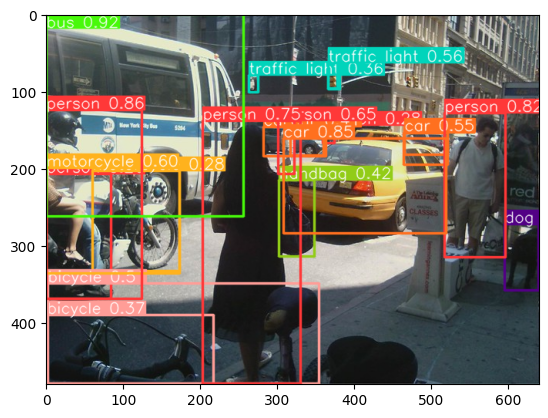

In [8]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(results[0].plot()[:,:,::-1])  # 원본이미지에 추론 결과를 표시한 결과 이미지를 반환 (ndarray: bgr mode)
plt.show()

In [ ]:
cv2.imshow('f', results[0].plot())
cv2.waitkey()
cv2.destroyAllWindows()

In [9]:
r = model(image_path, save=True, save_txt=True
          conf=0.7)


image 1/1 /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam/01_test_image/1.jpg: 480x640 6 persons, 2 bicycles, 5 cars, 2 motorcycles, 1 bus, 3 traffic lights, 1 dog, 1 handbag, 172.4ms
Speed: 4.3ms preprocess, 172.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict4


In [ ]:
# web상 이미지 추론 -> url 지정 => 현재작업 디렉토리에 다운로드 후 추론
url = 'https://image.dongascience.com/Photo/2020/03/5bddba7b6574b95d37b6079c199d7101.jpg'
r = model(url, save=True)

## 한번에 여러장 추론
- 이미지들이 있는 디렉토리 경로를 전달
- 추론할 파일경로를 리스트로 묶어서 추론한다.
    - <del>이 경우 추론성능이 좋지 않은 경우가 생긴다.</del> (YOLO 초기 버전)

In [10]:
from glob import glob
img_list = glob('01_test_image/*.jpg')
img_list

['01_test_image/4.jpg',
 '01_test_image/5.jpg',
 '01_test_image/6.jpg',
 '01_test_image/2.jpg',
 '01_test_image/3.jpg',
 '01_test_image/1.jpg']

In [11]:
r = model(img_list, save=True)


0: 640x640 2 elephants, 1 zebra, 1: 640x640 9 persons, 1 bottle, 12 wine glasss, 2 cups, 1 bowl, 1 dining table, 2: 640x640 3 persons, 1 cup, 1 knife, 3 pizzas, 1 dining table, 3: 640x640 13 persons, 3 cars, 3 buss, 1 truck, 2 traffic lights, 4: 640x640 1 cup, 1 chair, 1 tv, 1 mouse, 1 keyboard, 2 cell phones, 1 vase, 5: 640x640 5 persons, 3 bicycles, 4 cars, 1 motorcycle, 1 bus, 3 traffic lights, 1 dog, 1 handbag, 1536.2ms
Speed: 10.8ms preprocess, 256.0ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


In [13]:
r2 = model('02_test_image/', save=True)  # 리스트


image 1/12 /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam/02_test_image/apple.jpg: 416x640 1 bowl, 6 apples, 1 dining table, 110.3ms
image 2/12 /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam/02_test_image/banana.jpg: 384x640 1 banana, 97.1ms
image 3/12 /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam/02_test_image/banana2.jpg: 640x640 1 banana, 174.3ms
image 4/12 /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam/02_test_image/capsicum1.jpg: 640x640 2 vases, 305.4ms
image 5/12 /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam/02_test_image/capsicum2.jpg: 480x640 (no detections), 203.2ms
image 6/12 /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam/02_test_image/eggplant.jpg: 480x640 (no detections), 216.8ms
image 7/12 /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_

In [15]:
len(r2)  # 추론한 대상 이미지의 개수
# r2[0]  # 첫번째 이미지 결과
# r2[-1]  # 마지막 이미지 결과

12

## 동영상
- source에 동영상 파일 경로를 지정한다.
    - frame 단위로 추론한다.

In [17]:
r = model('01_test_image/indo_street.mp4',
          # save=True, show=True
         )



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/350) /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam/01_test_image/indo_street.mp4: 384x640 10 persons, 1 bench, 1 umbrella, 154.9ms
video 1/1 (2/350) /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam/01_test_image/indo_street.mp4: 384x640 10 persons, 1 bench, 2 umbrellas, 108.5ms
video 1/1 (3/350) /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detecti

In [18]:
len(r)

350

In [20]:
r = model(0,  # 정수: 웹캠 id
          show=True)

## 추론결과

### ultralytics.yolo.engine.results.Results
- 모델의 추론 결과는 list에 이미지별 예측결과를 Results에 담아 반환한다.
- **Results** : 한개 이미지에 대한 추론결과를 담는 객체
- 추론 종류에 따라 다음 속성을 이용해 결과를 조회한다.
    - Detection: **`result.boxes`** - Boxes type
    - Segmentation: **`result.masks`** - Masks type
    - Classification: **`result.probs`** - torch.Tensor type
    - Pose estimator: **`result.keypoints`** - Keypoints  type
- 추가 정보
    - Results.orig_img: 추론한 원본 이미지
    - Results.orig_shape: 추론한 원본 이미지의 크기 (height, width)
    - Results.path: 추론한 원본이미지의 경로
    - Results.names: class2classname 정의한 딕셔너리 (key: 클래스, name: 클래스 이름)
- 메소드
    - Results.plot(): 원본 이미지에 추론결과를 표현한 이미지를 ndarray로 반환 (opencv를 이용해서 만들기 때문에 BGR모드로 반환)

In [2]:
import os
os.getcwd()

'/Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam'

In [3]:
from ultralytics import YOLO

model = YOLO('models/yolov8s.pt')
result_list = model('01_test_image/1.jpg', conf=0.7)


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
image 1/1 /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam/01_test_image/1.jpg: 480x640 3 persons, 2 cars, 1 motorcycle, 1 bus, 1 dog, 730.8ms
Speed: 7.4ms preprocess, 730.8ms inference, 24.0ms postprocess per image at shape (1, 3, 480, 640)


In [4]:
print('총 이미지수:', len(result_list))
result = result_list[0]  # 첫번째 이미지에 대한 결과

총 이미지수: 1


원본이미지 경로:  /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam/01_test_image/1.jpg
원본이미지 size:  (480, 640)
원본이미지:  [[[200 232 231]
  [200 232 231]
  [200 232 231]
  ...
  [113 101  95]
  [ 95  97  85]
  [144 155 139]]

 [[201 232 231]
  [200 232 231]
  [200 232 231]
  ...
  [103  91  85]
  [ 83  85  73]
  [151 162 146]]

 [[203 231 231]
  [201 232 231]
  [201 232 229]
  ...
  [118 106 100]
  [ 80  82  70]
  [152 163 147]]

 ...

 [[ 49  40  27]
  [ 51  42  29]
  [ 51  41  31]
  ...
  [ 76  69  52]
  [ 72  65  48]
  [ 61  54  37]]

 [[ 38  28  18]
  [ 36  26  16]
  [ 36  26  16]
  ...
  [ 64  58  39]
  [ 63  57  38]
  [ 64  58  39]]

 [[ 86  76  66]
  [ 82  72  62]
  [ 80  70  60]
  ...
  [ 95  89  70]
  [100  94  75]
  [111 105  86]]] (480, 640, 3) uint8


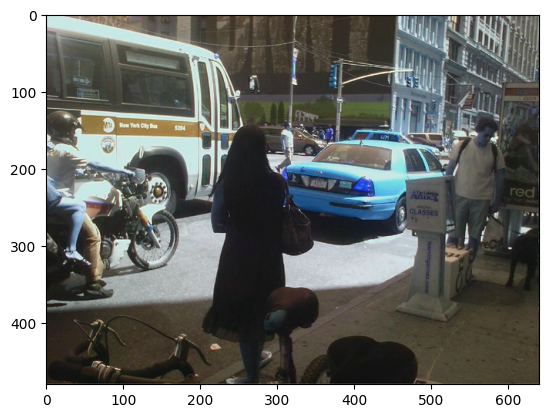

In [8]:
print('원본이미지 경로: ', result.path)
print('원본이미지 size: ', result.orig_shape)  # (height, width)
print('원본이미지: ', result.orig_img, result.orig_img.shape, result.orig_img.dtype)
import matplotlib.pyplot as plt

plt.imshow(result.orig_img)

In [10]:
# class
from pprint import pprint  # 자료구조를 보기좋게 출력하는 함수
pprint(result.names)  # key: index(class), name: class name  ==> 모델이 학습한 데이터의 idx2class를 반환

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

### Object Detection 결과값 조회

- ultralytics.yolo.engine.results.**Boxes**에 추론 결과를 담아 반환
    - Results.boxes로 조회
- 주요 속성
    - shape: 결과 shape. (찾은 물체개수, 6)
    - boxes
        - 6: 좌상단 x, 좌상단 y, 우하단 x, 우하단 y, confidence score, label
    - xyxy
        - bounding box의 `좌상단 x, 좌상단 y, 우하단 x, 우하단 y` 좌표 반환
    - xyxyn
        - xyxy를 이미지 대비 비율로 반환
    - xywh
        - bounding box의 `center x, center y, 너비, 높이` 를 반환
    - xywhn
        - xywh를 이미지 대비 비율로 반환
    - cls: 찾은 물체의 label
    - conf: cls에 대한 confidence score (그 물체일 확률)




> - 0차원 torch.Tensor 를 상수로 변환
>     - `tensor.item()`
> - N차원 torch.Tensor를 ndarray로 변환
>     - `tensor.numpy()`
>     - Tensor객체가 GPU메모리에 있을 경우 메인메모리(CPU)로 먼저 옮겨야 한다.
>         - `tensor.to('cpu')` or `tensor.cpu()`

In [12]:
# result_list[0]
boxes = result.boxes
print(type(boxes))  # Object Detection 결과 -> bbox 위치와 object class

<class 'ultralytics.engine.results.Boxes'>


In [19]:
print(boxes.conf.shape)  # 찾은 object의 class 확률
boxes.conf

torch.Size([8])


tensor([0.9389, 0.9196, 0.8995, 0.8812, 0.8729, 0.8461, 0.7283, 0.7213])

In [21]:
# 찾은 object 정보
print(boxes.cls.shape)  # boxes.cls: object class(index) => [8] => 찾은 object 8개. 8개 class
print(boxes.cls)
for c, p in zip(boxes.cls, boxes.conf):
    print(f'{int(c)} - {result.names[c.item()]}, {p*100:.3f}%')

torch.Size([8])
tensor([ 5.,  2.,  0.,  0.,  0.,  3.,  2., 16.])
5 - bus, 93.892%
2 - car, 91.958%
0 - person, 89.952%
0 - person, 88.116%
0 - person, 87.289%
3 - motorcycle, 84.606%
2 - car, 72.832%
16 - dog, 72.135%


In [23]:
## bbox 위치 - xyxy : 좌상단 x, y, 우하단 x, y 좌표
print(boxes.xyxy, boxes.xyxy.shape, sep='\n')  # shape: [8: 찾은 object 개수,  4: 좌표-좌상단xy, 우하단xy]

tensor([[8.5889e-01, 1.2250e+00, 2.5641e+02, 2.6216e+02],
        [3.0653e+02, 1.6258e+02, 5.1737e+02, 2.8614e+02],
        [1.8107e-01, 1.2493e+02, 1.1881e+02, 3.6624e+02],
        [2.0170e+02, 1.4166e+02, 3.1828e+02, 4.7757e+02],
        [5.1704e+02, 1.3033e+02, 5.9663e+02, 3.2384e+02],
        [8.7936e-02, 1.9597e+02, 1.7282e+02, 3.5359e+02],
        [2.7449e+02, 1.4545e+02, 3.6723e+02, 1.8393e+02],
        [5.9504e+02, 2.7713e+02, 6.3965e+02, 3.5859e+02]])
torch.Size([8, 4])


In [24]:
print(boxes.xyxyn, boxes.xyxyn.shape, sep='\n')  # 0 ~ 1 normalize(정규화) -> 이미지 크기 대비 비율

tensor([[1.3420e-03, 2.5520e-03, 4.0065e-01, 5.4617e-01],
        [4.7896e-01, 3.3870e-01, 8.0840e-01, 5.9612e-01],
        [2.8292e-04, 2.6026e-01, 1.8564e-01, 7.6300e-01],
        [3.1516e-01, 2.9512e-01, 4.9732e-01, 9.9493e-01],
        [8.0787e-01, 2.7152e-01, 9.3223e-01, 6.7467e-01],
        [1.3740e-04, 4.0826e-01, 2.7004e-01, 7.3665e-01],
        [4.2889e-01, 3.0302e-01, 5.7380e-01, 3.8319e-01],
        [9.2975e-01, 5.7735e-01, 9.9945e-01, 7.4705e-01]])
torch.Size([8, 4])


In [25]:
# bbox 위치 - xywh : center x, y 좌표, bbox의 너비, 높이
print(boxes.xywh, boxes.xywh.shape, sep='\n')
print(boxes.xywhn, boxes.xywhn.shape, sep='\n')  # xywhn => normalize

tensor([[128.6361, 131.6944, 255.5545, 260.9389],
        [411.9542, 224.3557, 210.8400, 123.5591],
        [ 59.4941, 245.5834, 118.6260, 241.3146],
        [259.9919, 309.6126, 116.5818, 335.9064],
        [556.8340, 227.0868,  79.5896, 193.5126],
        [ 86.4553, 274.7800, 172.7346, 157.6271],
        [320.8602, 164.6907,  92.7413,  38.4828],
        [617.3450, 317.8557,  44.6074,  81.4589]])
torch.Size([8, 4])
tensor([[0.2010, 0.2744, 0.3993, 0.5436],
        [0.6437, 0.4674, 0.3294, 0.2574],
        [0.0930, 0.5116, 0.1854, 0.5027],
        [0.4062, 0.6450, 0.1822, 0.6998],
        [0.8701, 0.4731, 0.1244, 0.4032],
        [0.1351, 0.5725, 0.2699, 0.3284],
        [0.5013, 0.3431, 0.1449, 0.0802],
        [0.9646, 0.6622, 0.0697, 0.1697]])
torch.Size([8, 4])


In [ ]:
# 원본 이미지에 bbox를 치고 class를 출력
import cv2
from ultralytics import YOLO 

# 1. 모델 생성
model = YOLO('models/yolov8s.pt')

# 2. 추론
result_list = model('01_test_image/1.jpg')
# 3. 추론결과를 이용한 추가 작업 ==> bbox 그리기

result = result_list[0]
# 원본이미지를 복사

org_img = result.orig_img
img = org_img.copy()

# bbox 추론결과를 조회
boxes = result.boxes
xyxy_list = boxes.xyxy  # 좌상단, 우하단 좌표 (bbox 위치)
cls_list = boxes.cls    # class index
conf_list = boxes.conf  # class 확률

# tensor -> ndarray 변환시 -> CPU로 이동시킨 후 변환 가능
for xyxy, cls, conf in zip(xyxy_list, cls_list, conf_list):
    pt1 = xyxy[:2].to('cpu').numpy().astype('int32')  # 좌상단 좌표
    pt2 = xyxy[2:].to('cpu').numpy().astype('int32')  # 우하단 좌표
    cls_name = result.names[int(cls.item())]
    txt = f"{cls_name}-{conf.item()*100:.2f}%"
    
    # image에 bbox
    cv2.rectangle(img, pt1=pt1, pt2=pt2, color=(255, 255, 255), thickness=1)
    # label text
    cv2.putText(img, text=txt, org=pt1-5, fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
                color=(255, 255, 255), thickness=1, lineType=cv2.LINE_AA)
    
# img 출력
cv2.imshow('result', img)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(0)
cv2.waitKey(0)
cv2.waitKey(0)


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
image 1/1 /Users/hongdagyeong/Documents/Pd/playdata/09_Computer_Vision/object_detection_exam/01_test_image/1.jpg: 480x640 7 persons, 1 bicycle, 6 cars, 2 motorcycles, 2 buss, 3 traffic lights, 1 dog, 1 handbag, 490.6ms
Speed: 5.9ms preprocess, 490.6ms inference, 20.9ms postprocess per image at shape (1, 3, 480, 640)


# TODO
- 웹캠 입력 디텍션

In [3]:
import cv2
from ultralytics import YOLO

# 웹캠연결
cap = cv2.VideoCapture(1)
# YOLO 모델 생성
model = YOLO('models/yolov8n.pt')

while cap.isOpened():
    # 한 frame(이미지)을 읽기
    succ, frame = cap.read()
    if not succ:
        print('웹캠 문제')
        break
    # filp(대칭)
    frame = cv2.flip(frame, 1)  # 양수: 좌우, 0: 상하, 음수: 상하좌우
    ################################################
    # YOLO 모델을 이용한 추론 -> 결과 이미지 생성
    ################################################
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # yolo는 rgb 이미지를 학습시킴
    # 추론 추론대상이미지타입 - 문자열(경로), Image(ndarray, PIL.Image)
    result = model(img,
                   conf=0.5,  # 확률이 0.5이상인 것만 결과로 리턴
                   verbose=False)[0]  # 추론 결과 로그를 출력하지 않음
    # 결과에서 위치, 클래스 정보 추출
    ### (찾은 object 개수, shape)
    xyxy_list = result.boxes.xyxy.to('cpu').numpy().astype('int32')
    cls_list = result.boxes.cls.to('cpu').numpy().astype('int32')
    conf_list = result.boxes.conf.to('cpu').numpy()
    
    # for in 문을 이용해 찾은 object 별로 bbox 처리를 함
    for xyxy, cls, conf in zip(xyxy_list, cls_list, conf_list):
        pt1, pt2 = xyxy[:2], xyxy[2:]
        txt = f'{result.names[cls]} - {conf*100:.3f}%'
        # box
        cv2.rectangle(frame, pt1, pt2, color=(255,0,0), thickness=2)
        cv2.putText(frame, txt, org=pt1,fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=1,
                    color=(200,0,0), thickness=1, lineType=cv2.LINE_AA)
    
    # 영상출력
    cv2.imshow('frame', frame)
    # 중단여부 확인
    if cv2.waitKey(1) == 27:  # esc 입력하면
        break

# 마무리
cap.release() # 웹캠 연결 종료
cv2.destroyAllWindows() # 출력 윈도우 종료